# Fitting with SciKitLearn

In this lesson, we are going to use the scikitlearn library to do a linear fit. When it comes to fitting equations in Python, you will encounter a lot of options. In this workshop, we will work with the library scikitlearn, and later the library statsmodels.

Another library you might encounter when doing fitting is scipy. While functionalities available from theses libraries can be similar in some cases, each has different strengths.Statsmodels provides rigourous statics while scipy has a lot of functionalities around science and engineering. SciKitLearn, which we use in this section, is geared toward machine learning.

For this lesson, we will just be doing linear fits. However, scikitlearrn has many different models built in, some of which we will see in the next session. SciKitLearn might not be the easiest library to use for analysis depending on your use case. However, we start with it here so we can better understand how to use the library for more complicated examples and models. API of scikitlearn

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("data/PubChemElements_all.csv")

In [5]:
df.head()

,AtomicNumber,Symbol,Name,AtomicMass,CPKHexColor,ElectronConfiguration,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,OxidationStates,StandardState,MeltingPoint,BoilingPoint,Density,GroupBlock,YearDiscovered
0,1,H,Hydrogen,1.008000,FFFFFF,1s1,2.20,120.0,13.598,0.754,"+1, -1",Gas,13.81,20.28,0.000090,Nonmetal,1766
1,2,He,Helium,4.002600,D9FFFF,1s2,NaN,140.0,24.587,NaN,0,Gas,0.95,4.22,0.000179,Noble gas,1868
2,3,Li,Lithium,7.000000,CC80FF,[He]2s1,0.98,182.0,5.392,0.618,+1,Solid,453.65,1615.00,0.534000,Alkali metal,1817
3,4,Be,Beryllium,9.012183,C2FF00,[He]2s2,1.57,153.0,9.323,NaN,+2,Solid,1560.00,2744.00,1.850000,Alkaline earth metal,1798
4,5,B,Boron,10.810000,FFB5B5,[He]2s2 2p1,2.04,192.0,8.298,0.277,+3,Solid,2348.00,4273.00,2.370000,Metalloid,1808


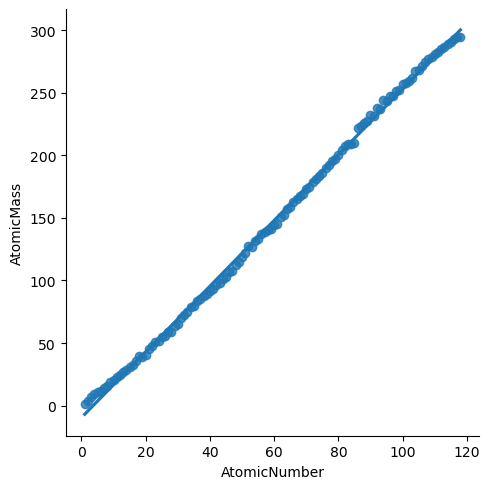

In [6]:
import seaborn as sns

sns.lmplot(x="AtomicNumber", y="AtomicMass", data=df)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [9]:
linear_model = LinearRegression()

X = df[["AtomicNumber"]]
Y = df[["AtomicMass"]]

linear_model.fit(X, Y)

LinearRegression()

In [10]:
print(f"The coefficient is {linear_model.coef_} and the intercept is {linear_model.intercept_}.")

The coefficient is [[2.62451501]] and the intercept is [-9.55100772].


In [11]:
linear_model.score(X, Y)

0.9985161197888499

In [12]:
## Making predictions
fit_data = df[["AtomicNumber", "AtomicMass"]].copy()
fit_data["predicted"] = linear_model.predict(df[["AtomicNumber"]])

In [13]:
fit_data.head(20)

,AtomicNumber,AtomicMass,predicted
0,1,1.008000,-6.926493
1,2,4.002600,-4.301978
2,3,7.000000,-1.677463
3,4,9.012183,0.947052
4,5,10.810000,3.571567
5,6,12.011000,6.196082
6,7,14.007000,8.820597
7,8,15.999000,11.445112
8,9,18.998403,14.069627
9,10,20.180000,16.694142


In [21]:
# Fitting to Multiple Variables
linear_model = LinearRegression()

fit_data = df[["AtomicMass", "AtomicNumber", "Density"]].copy()

fit_data.dropna(axis=0, how="any", inplace=True)

X = fit_data[["AtomicNumber", "Density"]]
Y = fit_data["AtomicMass"]

linear_model.fit(X, Y)

print(f"The coefficient is {linear_model.coef_} and the intercept is {linear_model.intercept_}.")

The coefficient is [ 2.6262646  -0.10402027] and the intercept is -9.089671096012367.


## Other Models

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [23]:
rf_model = RandomForestRegressor()

fit_data = df[["AtomicMass", "AtomicNumber", "Density"]].copy()

fit_data.dropna(axis=0, how="any", inplace=True)

X = fit_data[["AtomicNumber", "Density"]]
Y = fit_data["AtomicMass"]

rf_model.fit(X, Y)

RandomForestRegressor()

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [25]:
X_train

,AtomicNumber,Density
94,95,13.690000
46,47,10.501000
43,44,12.100000
75,76,22.570000
40,41,8.570000
...,...,...
90,91,15.370000
92,93,20.250000
93,94,19.840000
16,17,0.003214


In [26]:
X_test

,AtomicNumber,Density
14,15,1.820000
21,22,4.500000
1,2,0.000179
0,1,0.000090
23,24,7.150000
30,31,5.910000
6,7,0.001251
85,86,0.009730
65,66,8.550000
13,14,2.329600
